# Generic Base Code


In [ ]:
# Import libraries

# If they're not installed for you, use "!pip install library_name"

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import re
from gensim import corpora
from gensim.models import LdaModel
import string

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Jul 10 - Jul 14

### Resources:


* Data Loading: https://www.w3schools.com/python/pandas/pandas_csv.asp
* Data Cleaning: https://towardsdatascience.com/cleaning-text-data-with-python-b69b47b97b76
* Tokenization: https://towardsdatascience.com/5-simple-ways-to-tokenize-text-in-python-92c6804edfc4
* Stemming/Lemmatization: https://www.datacamp.com/tutorial/stemming-lemmatization-python


If you cannot open Towards Data Science articles, copy the link and open it in incognito.



In [ ]:
# Load Twitter data
def load_twitter_data(filepath):
  # data is stored on Github
  # this is the file path ⬇️
  # https://gist.githubusercontent.com/aptitude-learn/991521c2ccf14b423f828c290f6a4c25/raw/ecf97076dcf666b78e1509da1a21570d7950f8a5/disney.csv
    filepath= "https://gist.githubusercontent.com/aptitude-learn/991521c2ccf14b423f828c290f6a4c25/raw/ecf97076dcf666b78e1509da1a21570d7950f8a5/disney.csv"
    data = pd.read_csv(filepath)

     # Handling Missing Values
    data = data.dropna()  # Drop rows with missing values

    # Data Type Conversion
    # data['numeric_column'] = pd.to_numeric(data['numeric_column'])  # Convert a numeric column

    # Removing Duplicates
    data = data.drop_duplicates()  # Remove duplicate rows

    # Add any additional preprocessing steps for loading data (e.g., handle missing values) [Done]
    return data

# Data cleaning
def clean_data(text):
    # Add data cleaning steps (e.g., remove special characters, URLs, hashtags, etc.)

    # Lowercase the text
    text = text.lower()

    # Remove unicode characters
    text = text.encode('ascii', 'ignore').decode()

    # Remove stop words
    stop_words = stopwords.words("english")

    stop_words.append('disney')
    stop_words.append('ooo')

    text = ' '.join([word for word in text.split(' ') if word not in stop_words])

    # Remove mentions
    text = re.sub("@\S+", " ", text)

    # Remove URLs
    text = re.sub("https*\S+", " ", text)

    # Remove hastags
    text = re.sub("#\S+", " ", text)

    # Remove ticks and the next character
    text = re.sub("\'\w+", '', text)

    # Remove punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

    # Remove numbers
    text = re.sub(r'\w*\d+\w*', '', text)

    # Replace the over spaces
    text = re.sub('\s{2,}', " ", text)

    return text

In [ ]:
data = load_twitter_data("https://gist.githubusercontent.com/aptitude-learn/991521c2ccf14b423f828c290f6a4c25/raw/ecf97076dcf666b78e1509da1a21570d7950f8a5/disney.csv")

In [ ]:
data.head()

,Unnamed: 0,ID,URL,Timestamp,Username,Text
0,0,1.663622e+18,https://twitter.com/koworepi/status/1663621678...,"May 30, 2023 · 7:01 PM UTC",@koworepi,qqun veut aller à disney cet été ?
1,1,1.663622e+18,https://twitter.com/DisneyTips_com/status/1663...,"May 30, 2023 · 7:01 PM UTC",@DisneyTips_com,No need to wait for happy hour; you're on vaca...
2,2,1.663622e+18,https://twitter.com/jrdblades/status/166362166...,"May 30, 2023 · 7:01 PM UTC",@jrdblades,So how does this change prevent Disney from ha...
3,3,1.663622e+18,https://twitter.com/shillkovski/status/1663621...,"May 30, 2023 · 7:01 PM UTC",@shillkovski,I demand a white Pocahontas remake by Disney o...
4,4,1.663622e+18,https://twitter.com/LeanRight6/status/16636216...,"May 30, 2023 · 7:01 PM UTC",@LeanRight6,This isn't just about the leftist fools at Dis...


In [ ]:
def tokenize(text):
    # Add any additional tokenization steps (e.g., remove stopwords)

    # Remove stopwords
    stop_words = stopwords.words("english")
    tokens = [token for token in tokens if token not in stop_words]

    # Remove short words
    tokens = [token for token in tokens if len(token) > 2]

    # Remove non-alphabetic tokens
    tokens = [token for token in tokens if token.isalpha()]
    cleaned_text.split()
    return tokens

     # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]

    # Remove repeated characters
    tokens = [re.sub(r'(.)\1+', r'\1\1', token) for token in tokens]

    # Remove tokens starting with '@'
    tokens = [token for token in tokens if not token.startswith('@')]

    # Remove tokens with digits
    tokens = [token for token in tokens if not any(char.isdigit() for char in token)]

    # Remove single-character tokens
    tokens = [token for token in tokens if len(token) > 1]

    # Remove tokens with special characters
    tokens = [re.sub(r'[^a-zA-Z0-9\s]', '', token) for token in tokens]

In [ ]:
# Lemmatization
def lemmatize(data):
  lemmatizer = WordNetLemmatizer()
  # Applying lemmatization to the text in the data
  data['text'] = data['text'].apply(lambda x: lemmatize_text(x, lemmatizer))
  # Returning the lemmatized data
  return data

def lemmatize_text(text, lemmatizer):
    tokens = tokenize(text)
    # Lemmatizing the tokens in the text using lemmatizer
    lemmas = [lemmatizer.lemmatize(token) for token in tokens]
    # Returning the lemmatized tokens
    return lemmas

In [ ]:
clean_list = []

data_list = list(data['Text'])

# function
new_data = lambda data_list: [clean_list.append(clean_data(x)) for x in data_list]
new_data(data_list)

data['clean_text'] = clean_list

In [ ]:
data.head()

,Unnamed: 0,ID,URL,Timestamp,Username,Text,clean_text
0,0,1.663622e+18,https://twitter.com/koworepi/status/1663621678...,"May 30, 2023 · 7:01 PM UTC",@koworepi,qqun veut aller à disney cet été ?,qqun veut aller cet
1,1,1.663622e+18,https://twitter.com/DisneyTips_com/status/1663...,"May 30, 2023 · 7:01 PM UTC",@DisneyTips_com,No need to wait for happy hour; you're on vaca...,need wait happy hour vacay youre looking best ...
2,2,1.663622e+18,https://twitter.com/jrdblades/status/166362166...,"May 30, 2023 · 7:01 PM UTC",@jrdblades,So how does this change prevent Disney from ha...,change prevent future continued growth public ...
3,3,1.663622e+18,https://twitter.com/shillkovski/status/1663621...,"May 30, 2023 · 7:01 PM UTC",@shillkovski,I demand a white Pocahontas remake by Disney o...,demand white pocahontas remake bruteforce bitc...
4,4,1.663622e+18,https://twitter.com/LeanRight6/status/16636216...,"May 30, 2023 · 7:01 PM UTC",@LeanRight6,This isn't just about the leftist fools at Dis...,leftist fools disney much bigger that big gove...


In [ ]:
!pip install langdetect

In [ ]:
from langdetect import detect

In [ ]:
labels = []
data_list = list(data['Text'])

def is_english(data_list=data_list):
  for i in range(len(data_list)):
    try:
      if detect(data_list[i]) == 'en':
        labels.append('en')
      else:
        labels.append('NAN')
    except:
      labels.append('NAN')
  print(labels)

In [ ]:
is_english(data_list)

['NAN', 'en', 'en', 'en', 'en', 'en', 'NAN', 'en', 'en', 'en', 'NAN', 'NAN', 'en', 'NAN', 'en', 'NAN', 'en', 'en', 'en', 'en', 'en', 'NAN', 'en', 'en', 'NAN', 'en', 'NAN', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'NAN', 'NAN', 'en', 'en', 'en', 'en', 'en', 'NAN', 'NAN', 'NAN', 'en', 'en', 'NAN', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'NAN', 'en', 'NAN', 'en', 'en', 'NAN', 'en', 'en', 'NAN', 'NAN', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'NAN', 'NAN', 'en', 'en', 'en', 'en', 'NAN', 'NAN', 'en', 'NAN', 'en', 'NAN', 'NAN', 'en', 'en', 'en', 'en', 'en', 'NAN', 'en', 'NAN', 'en', 'en', 'en', 'NAN', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'en', 'NAN', 'en', 'NAN', 'en', 'en', 'en', 'en', 'NAN', 'en', 'NAN', 'NAN', 'en', 'NAN', 'en', 'en', 'en', 'NAN', 'en', 'en', 'NAN', 'en', 'en', 'NAN', 'NAN', 'en', 'en', 'en', 'NAN', 'NAN', 'en', 'NAN', 'en', 'en', 'en', 'NAN', 'NAN', 'NAN', 'en', 'en', 'NAN', 'en', 'NAN', 'NAN', 'N

In [ ]:
data['labels'] = labels

In [ ]:
data = data[data.labels != 'NAN']

In [ ]:
data.head()

,Unnamed: 0,ID,URL,Timestamp,Username,Text,clean_text,labels
1,1,1.663622e+18,https://twitter.com/DisneyTips_com/status/1663...,"May 30, 2023 · 7:01 PM UTC",@DisneyTips_com,No need to wait for happy hour; you're on vaca...,need wait happy hour vacay youre looking best ...,en
2,2,1.663622e+18,https://twitter.com/jrdblades/status/166362166...,"May 30, 2023 · 7:01 PM UTC",@jrdblades,So how does this change prevent Disney from ha...,change prevent future continued growth public ...,en
3,3,1.663622e+18,https://twitter.com/shillkovski/status/1663621...,"May 30, 2023 · 7:01 PM UTC",@shillkovski,I demand a white Pocahontas remake by Disney o...,demand white pocahontas remake bruteforce bitc...,en
4,4,1.663622e+18,https://twitter.com/LeanRight6/status/16636216...,"May 30, 2023 · 7:01 PM UTC",@LeanRight6,This isn't just about the leftist fools at Dis...,leftist fools disney much bigger that big gove...,en
5,5,1.663622e+18,https://twitter.com/AnanadroD/status/166362165...,"May 30, 2023 · 7:01 PM UTC",@AnanadroD,Iooking like Disney Princess 🥰🥰🧿,iooking like princess,en


## Jul 17 - Jul 21

### Resources:


* TF-IDF: https://youtu.be/UvsQPsrZTK4

You may use another format of transforming words (i.e. word2vec).
* Topic Modeling and Visualization: https://www.youtube.com/watch?v=TKjjlp5_r7o&ab_channel=PythonTutorialsforDigitalHumanities



In [ ]:
# TF-IDF
def calculate_tfidf(corpus):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
    return tfidf_matrix

# Topic modeling
def perform_topic_modeling(tfidf_matrix, num_topics):
  lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
  topic_matrix = lda_model.fit_transform(tfidf_matrix)
  tfidf_feature_name = tfidf_vectorizer.get_feature_names_out()
  top_words_per_topic = []
  for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[:-top_words - 1: -1]
    top_words_per_topic.append([tfidf_feature_names[i] for i in top_words_idx])
  return lda_model, topic_matrix

In [ ]:
from gensim.models import TfidfModel

documents = data['clean_text'].apply(lambda x: x.split())

dictionary = corpora.Dictionary(documents)

tfidf_model = TfidfModel(dictionary=dictionary)

# Create corpus
corpus = [tfidf_model[dictionary.doc2bow(doc.split())] for doc in data['clean_text']]

In [ ]:
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

In [ ]:
!pip install wordcloud

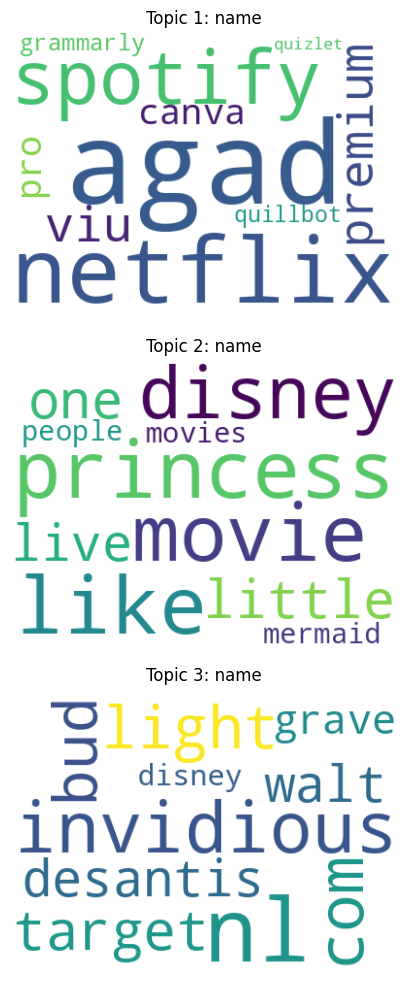

In [ ]:
from wordcloud import WordCloud
topics = lda_model.show_topics(num_topics=3, formatted=False)

fig, axes = plt.subplots(nrows=3, figsize=(10, 10), dpi=100)
for i, (topic, keywords) in enumerate(topics):
    keywords = dict(keywords)
    wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(keywords)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    #axes[i].set_title(f"Topic {i+1}")
    axes[i].axis('off')
axes[0].set_title('Topic 1: name')
axes[1].set_title('Topic 2: name')
axes[2].set_title('Topic 3: name')
plt.tight_layout()
plt.show()

## Jul 24 - Jul 28

### Resources:
* Sentiment Analysis: https://towardsdatascience.com/social-media-sentiment-analysis-in-python-with-vader-no-training-required-4bc6a21e87b8

* Visualization (Sentiment Analysis): https://medium.com/analytics-vidhya/different-ways-of-visualizing-twitter-sentiments-analysis-in-r-270d5d459603

In [ ]:
# Sentiment similarity
def perform_sentiment_analysis(text):
  # Download VADER lexicon (if not already downloaded)
    nltk.download('vader_lexicon')
    sid = SentimentIntensityAnalyzer()
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores

# Visualization
def visualize_topics(topic_matrix):
    topic_data = pd.DataFrame(topic_matrix, columns=[f"Topic_{i}" for i in range(topic_matrix.shape[1])])
    topic_means = topic_data.mean()
    sns.barplot(x=topic_means.index, y=topic_means.value)
    plt.title('Topic Distribution')
    plt.xlabel('Topic')
    plt.ylabel('Mean Topic Value')
    plt.show()

def visualize_similarity(similarity_matrix):
    sns.heatmap(similarity_matrix, cmap='coolwarm', annot=True, fmt=".2f")
    plt.title('Similarity Matrix')
    plt.xlabel('Tweet Index')
    plt.ylabel('Tweet Index')
    plt.show()

In [ ]:
# Main function

def main():
    # Load Twitter data
    filepath = "path_to_twitter_data.csv"
    twitter_data = load_twitter_data(filepath)

    # Clean data
    twitter_data['cleaned_text'] = twitter_data['text'].apply(clean_data)

    #Tokenization
    twitter_data['tokens'] = twitter_data['clean_text'].apply(tokenize)

    # Lemmatization
    twitter_data['lemmas'] = twitter_data['tokens'].apply(lemmatize)

    # TF-IDF
    corpus = twitter_data['lemmas'].apply(lambda lemmas: ' '.join(lemmas))
    tfidf_matrix = calculate_tfidf(corpus)

    # Topic modeling
    num_topics = 10  # Set the desired number of topics
    lda_model, topic_matrix = perform_topic_modeling(tfidf_matrix, num_topics)

    # Semantic similarity
    similarity_matrix = calculate_semantic_similarity(tfidf_matrix)

    # Visualization
    visualize_topics(topic_matrix)
    visualize_similarity(similarity_matrix)

    #Sentiment Analysis
    twitter_data = perform_sentiment_analysis(twitter_data)
    print(twitter_data[['clean_text', 'sentiment_scores']])

if __name__ == '__main__':
    main()

KeyError: ignored